In [1]:
import pandas as pd
import numpy as np
from diffprivlib.models import LogisticRegression, GaussianNB
from diffprivlib.tools import mean, histogram
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import sklearn.naive_bayes 
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from benchmark import DifferentialPrivacyBenchmark

In [2]:
# Load and preprocess the Titanic dataset
url = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"
df = pd.read_csv(url)

# Handle missing values and encode categorical variables
df = df.copy()
df['Age'] = df['Age'].fillna(df['Age'].median())
df['Embarked'] = df['Embarked'].fillna('S')
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})
df['Embarked'] = df['Embarked'].map({'C': 0, 'Q': 1, 'S': 2})

features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']
target = 'Survived'
X = df[features]
y = df[target]

epsilon_values = [0.1, 1.0, 10.0, 100.0]

In [3]:
# Create benchmark instance
benchmark = DifferentialPrivacyBenchmark(X, y, epsilon_values)
benchmark.scale_data()

# Benchmark Logistic Regression (Private and Non-Private)
benchmark.benchmark_private_model("Logistic Regression", LogisticRegression)
benchmark.benchmark_non_private_model("Logistic Regression", LogisticRegression)

# Benchmark Naive Bayes (Private and Non-Private)
benchmark.benchmark_private_model("Naive Bayes", GaussianNB)
benchmark.benchmark_non_private_model("Naive Bayes", sklearn.naive_bayes.GaussianNB)

# Get and display results
results_df = benchmark.get_results_dataframe()
print(results_df)

# Save results to CSV
results_df.to_csv("benchmark_results.csv", index=False)

                 Model      Epsilon  Accuracy  Precision    Recall        F1
0  Logistic Regression          0.1  0.418994   0.302632  0.310811  0.306667
1  Logistic Regression          1.0  0.312849   0.257426  0.351351  0.297143
2  Logistic Regression         10.0  0.312849   0.230769  0.283784  0.254545
3  Logistic Regression        100.0  0.413408   0.413408  1.000000  0.584980
4  Logistic Regression  Non-Private  0.804469   0.782609  0.729730  0.755245
5          Naive Bayes          0.1  0.374302   0.243243  0.243243  0.243243
6          Naive Bayes          1.0  0.664804   0.562500  0.851351  0.677419
7          Naive Bayes         10.0  0.692737   0.581197  0.918919  0.712042
8          Naive Bayes        100.0  0.703911   0.589744  0.932432  0.722513
9          Naive Bayes  Non-Private  0.776536   0.712500  0.770270  0.740260


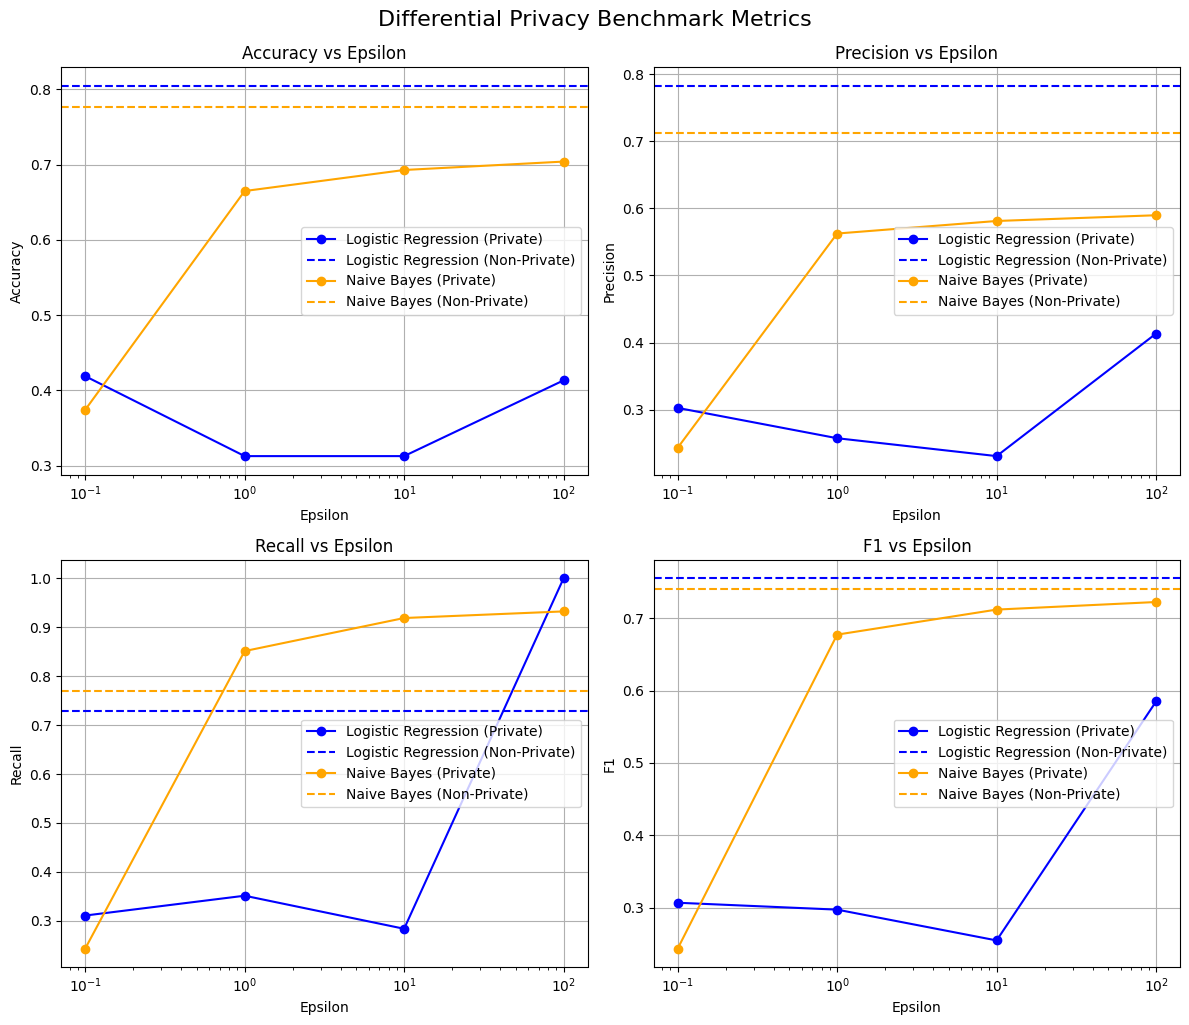

In [4]:
benchmark.plot_metrics()